<a href="https://colab.research.google.com/github/hongjai-rhee/public/blob/master/%5B1%5D%EC%8B%9C%EC%9E%91%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 생성과정이 알려져 있는 경우의 학습과정을 살펴봅시다
아래 데이터는 y= 3+x1-2*x2의 식으로 만들어져 있습니다. 


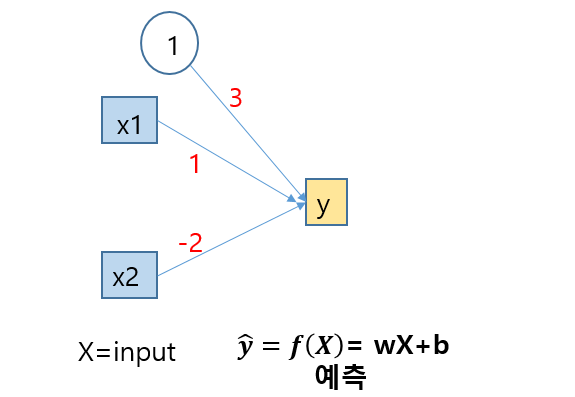

In [0]:
# 필요한 라이브러리 불러오기
import pandas as pd; import numpy as np; from keras.models import Sequential; from keras.layers import Dense, Dropout, Activation
# 깃허브 링크하기 
!git clone https://github.com/hongjai-rhee/public.git


Using TensorFlow backend.


Cloning into 'public'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 224 (delta 19), reused 21 (delta 7), pack-reused 178
Receiving objects: 100% (224/224), 7.88 MiB | 5.21 MiB/s, done.
Resolving deltas: 100% (97/97), done.


# 딥러닝을 위한 핵심 library로 구글이 개발한 tensorflow가 가장 널리 사용되고 있습니다.
딥마인드의 알파고도 이것을 사용해서 개발되었습니다.

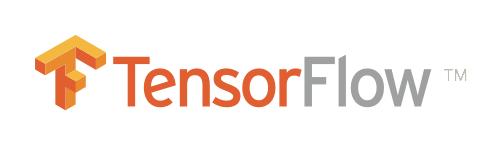

# 연습 데이터 불러오기

In [0]:
dat = pd.read_csv('/content/public/trivial.csv')
print(dat.head())

dat = np.array(dat)
x=dat[:,0:2]
y=dat[:,2]
print(x.shape, y.shape)

         x1        x2         y
0  0.170512  0.886989  1.396534
1  0.055084  0.714022  1.627041
2  0.580548  0.250756  3.079036
3  0.532928  0.854446  1.824037
4  0.244205  0.425245  2.393715
(1000, 2) (1000,)


# 데이터를 훈련과 검증 셋으로 나누어 줍니다 
훈련셋은 파라미터 추정에, 검증셋은 학습모형의 예측력을 미리 테스트하는 목적으로 사용합니다. 

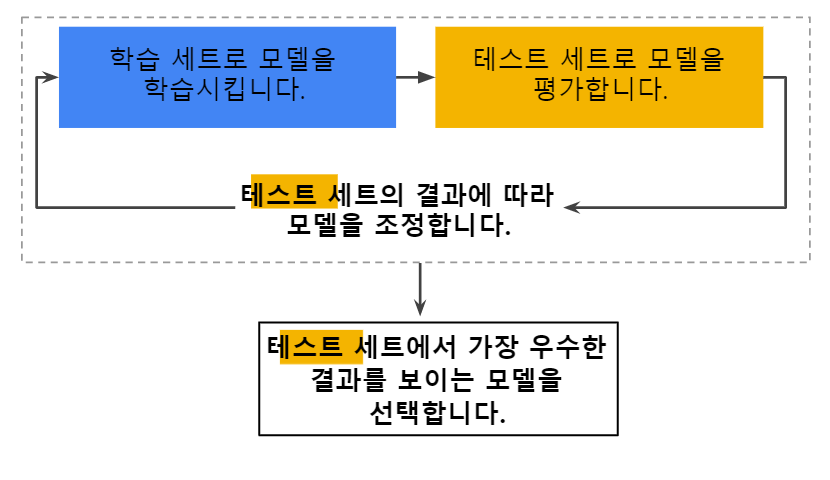

In [0]:
x_train=x[0:800,];x_test=x[800:1000,]
y_train=y[0:800,];y_test=y[800:1000,]
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(800, 2) (200, 2) (800,) (200,)


# 모델을 설정합니다.

In [0]:
model = Sequential()
model.add(Dense(1, input_dim=2))   ## x에서 y로 가는 레이어 하나 (단층망)
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


# 학습시키기
mse를 낮추는 방향으로 파라미터가 변화합니다.


Epoch 1/100
 - 0s - loss: 3.3880e-04
Epoch 2/100
 - 0s - loss: 1.3833e-04
Epoch 3/100
 - 0s - loss: 3.7852e-05
Epoch 4/100
 - 0s - loss: 4.3908e-06
Epoch 5/100
 - 0s - loss: 1.1917e-06
Epoch 6/100
 - 0s - loss: 9.5008e-07
Epoch 7/100
 - 0s - loss: 1.1512e-06
Epoch 8/100
 - 0s - loss: 1.0068e-06
Epoch 9/100
 - 0s - loss: 8.3625e-07
Epoch 10/100
 - 0s - loss: 1.1323e-06
Epoch 11/100
 - 0s - loss: 1.0319e-06
Epoch 12/100
 - 0s - loss: 1.1777e-06
Epoch 13/100
 - 0s - loss: 7.8670e-07
Epoch 14/100
 - 0s - loss: 1.0264e-06
Epoch 15/100
 - 0s - loss: 1.0778e-06
Epoch 16/100
 - 0s - loss: 1.1023e-06
Epoch 17/100
 - 0s - loss: 9.2381e-07
Epoch 18/100
 - 0s - loss: 1.0348e-06
Epoch 19/100
 - 0s - loss: 9.8781e-07
Epoch 20/100
 - 0s - loss: 1.2291e-06
Epoch 21/100
 - 0s - loss: 8.9247e-07
Epoch 22/100
 - 0s - loss: 1.0138e-06
Epoch 23/100
 - 0s - loss: 9.9172e-07
Epoch 24/100
 - 0s - loss: 9.4122e-07
Epoch 25/100
 - 0s - loss: 1.1285e-06
Epoch 26/100
 - 0s - loss: 1.0057e-06
Epoch 27/100
 - 0s - 

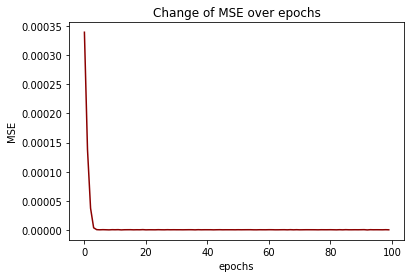

In [0]:
EPOCH=100  ## 학습횟수 정하기
# 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='mse')
# 모델 학습시키기
hist = model.fit(x_train, y_train, epochs = EPOCH, verbose = 2)

from sklearn.metrics import r2_score; import matplotlib.pyplot as plt
# 5. 학습과정 살펴보기
plt.plot(range(EPOCH), hist.history['loss'], label='Mean Square Errors', color='darkred')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.title('Change of MSE over epochs')
plt.show()

# 학습된 파라미터 출력

In [0]:
print(model.layers[0].get_weights())


[array([[ 0.9997854],
       [-2.000207 ]], dtype=float32), array([2.9996715], dtype=float32)]


# 예측하기

In [0]:
 
x_new= x_test[0:5]; print('X');print(np.round(x_new,2)); 
yhat = model.predict(x_new)
print('predicted value'); print(np.round(yhat,2))
print('true value'); print(np.round(y_test[0:5],2))
## EOF


X
[[0.32 0.24]
 [0.71 0.59]
 [0.35 0.45]
 [0.32 0.56]
 [0.18 0.44]]
predicted value
[[2.84]
 [2.52]
 [2.45]
 [2.21]
 [2.29]]
true value
[2.84 2.52 2.45 2.21 2.29]


# 불확실성의 탐험
사실 우리는 f(X)의 형태를 알지 못합니다. 적절한 네트워크의 구조를 찾아, 충분히 학습하는 것이 필요합니다. 
